In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Link: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

In [3]:
!cp "/content/drive/My Drive/Dataset_MRI.zip" ./Dataset_MRI.zip

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import imutils
import seaborn as sns

In [15]:
import zipfile
import os
zip_ref = zipfile.ZipFile('/content/Dataset_MRI.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/Dataset')
zip_ref.close()

In [16]:
file="/content/Dataset/Training"

In [17]:
import pathlib
data_dir=pathlib.Path(file)
data_dir

PosixPath('/content/Dataset/Training')

In [18]:
image_count = len(list(data_dir.glob("*/*")))
image_count

2870

In [19]:
dataset_dict = {
    'glioma_tumor' : list(data_dir.glob('glioma_tumor/*')),
    'meningioma_tumor' : list(data_dir.glob('meningioma_tumor/*')),
    'no_tumor' : list(data_dir.glob('no_tumor/*')),
    'pituitory_tumor' : list(data_dir.glob('pituitary_tumor/*')),
}

In [20]:
len(dataset_dict['glioma_tumor'])

826

In [21]:
len(dataset_dict['meningioma_tumor'])

822

In [22]:
len(dataset_dict['no_tumor'])

395

In [23]:
len(dataset_dict['pituitory_tumor'])

827

In [24]:
labels_dict = {
    'glioma_tumor' : 0,
    'meningioma_tumor' : 1,
    'no_tumor' : 2,
    'pituitory_tumor' : 3,
}

In [25]:
X,y=[],[]
for name, images in dataset_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    img=cv2.resize(img,(180, 180))
    #image processing
    kernel = np.array([[-1,-1,-1],
                       [-1, 9,-1],
                       [-1,-1,-1]])
    #sharpening
    img = cv2.filter2D(img, -1, kernel)
    #blurring
    img = cv2.bilateralFilter(img,9,75,75)
    #convering arrary to 2d removing rgb
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)
    y.append(labels_dict[name])

In [26]:
file="/content/Dataset/Testing"

In [27]:
data_dir=pathlib.Path(file)
data_dir

PosixPath('/content/Dataset/Testing')

In [28]:
dataset_dict = {
    'glioma_tumor' : list(data_dir.glob('glioma_tumor/*')),
    'meningioma_tumor' : list(data_dir.glob('meningioma_tumor/*')),
    'no_tumor' : list(data_dir.glob('no_tumor/*')),
    'pituitory_tumor' : list(data_dir.glob('pituitary_tumor/*')),
}

In [29]:
image_count = len(list(data_dir.glob("*/*")))
image_count

394

In [30]:
len(dataset_dict['glioma_tumor'])

100

In [31]:
len(dataset_dict['meningioma_tumor'])

115

In [32]:
len(dataset_dict['no_tumor'])

105

In [33]:
len(dataset_dict['pituitory_tumor'])

74

In [34]:
for name, images in dataset_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    img=cv2.resize(img,(180, 180))
    #image processing
    kernel = np.array([[-1,-1,-1],
                       [-1, 9,-1],
                       [-1,-1,-1]])
    #sharpening
    img = cv2.filter2D(img, -1, kernel)
    #blurring
    img = cv2.bilateralFilter(img,9,75,75)
    #convering arrary to 2d removing rgb
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)
    y.append(labels_dict[name])

In [35]:
X=np.array(X)
y=np.array(y)

In [36]:
from sklearn.utils import shuffle
X, y = shuffle(X,y, random_state=101)

In [37]:
X.shape

(3264, 180, 180, 3)

In [38]:
from sklearn.model_selection import train_test_split
X, X_real_test, y, y_real_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
X_real_test=X_real_test/255

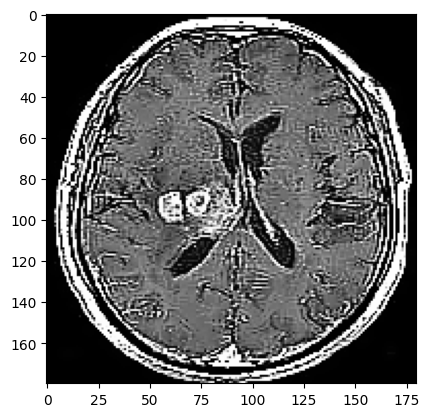

In [40]:
plt.imshow(X[0])

In [41]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [42]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [44]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.1),
    ]
)

In [45]:
%rm -rf logs4

In [48]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),  # Input shape defined here
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

model0 = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=20, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Conv2D(filters=40, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Conv2D(filters=60, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Conv2D(filters=80, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Conv2D(filters=100, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Conv2D(filters=120, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='sigmoid'),
])

model0.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy'],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
labels = ['glioma_tumor','meningioma_tumor','pituitary_tumor','no_tumor']

0
Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.3165 - loss: 1.3611
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4490 - loss: 1.1669
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5773 - loss: 1.0342
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5995 - loss: 0.8812
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6196 - loss: 0.8280
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6885 - loss: 0.7511
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6702 - loss: 0.7509
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6836 - loss: 0.7036
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7006 - loss: 0.6927
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7192 - loss: 0.6719
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7423 - loss: 0.5893
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accura

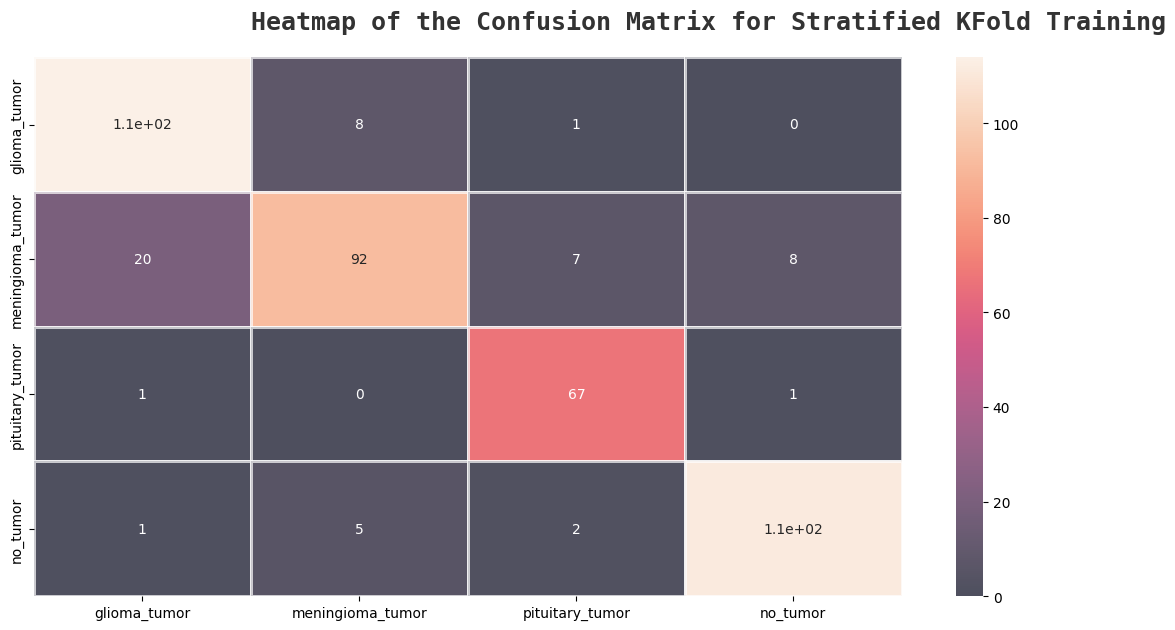

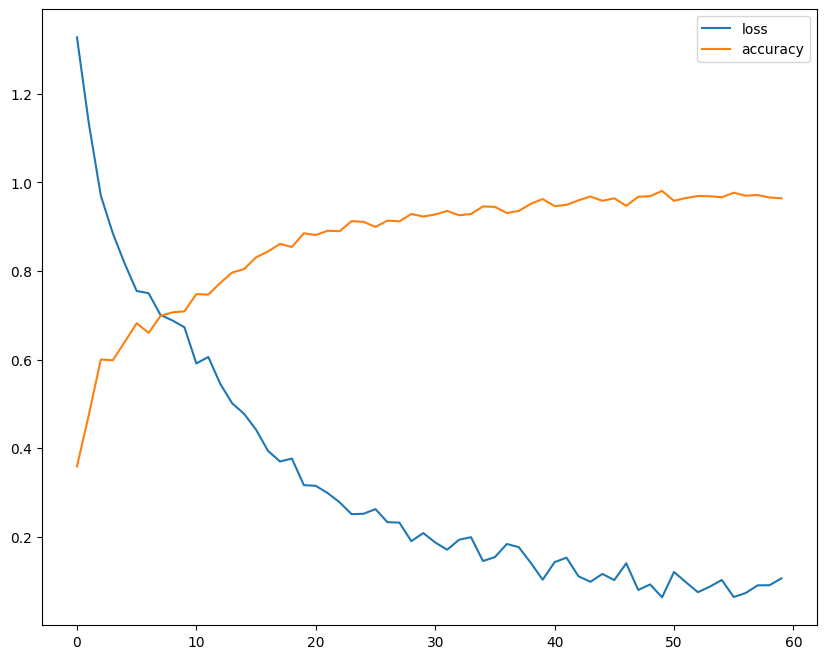

1
Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9523 - loss: 0.1498
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9743 - loss: 0.0871
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9671 - loss: 0.1011
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9428 - loss: 0.1633
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9731 - loss: 0.0859
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9690 - loss: 0.0753
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9843 - loss: 0.0441
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9768 - loss: 0.0695
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9659 - loss: 0.0950
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9753 - loss: 0.0809
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9822 - loss: 0.0484
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accurac

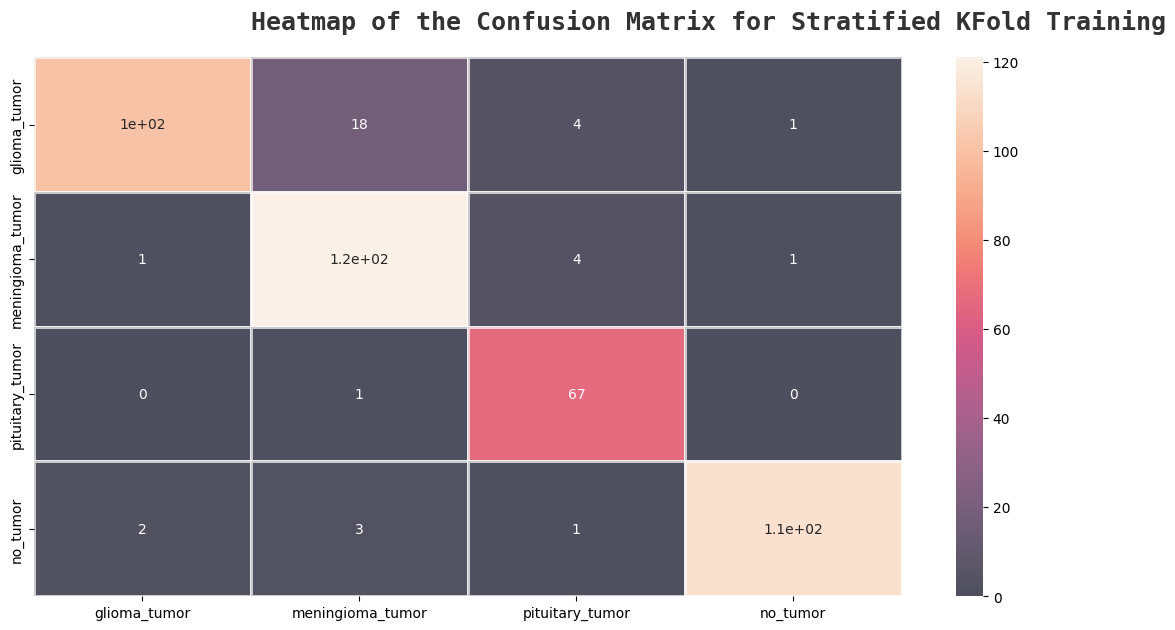

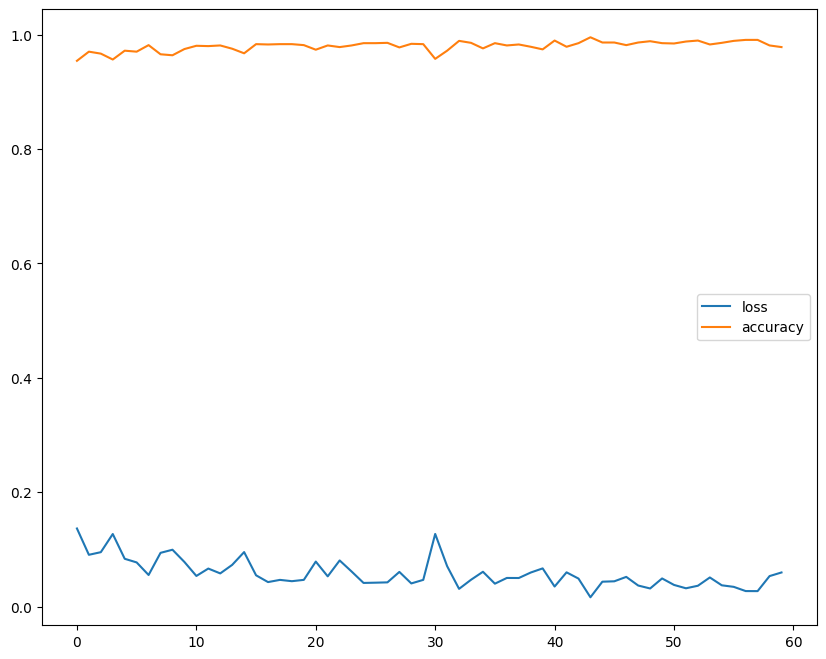

2
Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9682 - loss: 0.0947
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9652 - loss: 0.1174
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9725 - loss: 0.0651
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9853 - loss: 0.0459
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9767 - loss: 0.0655
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9794 - loss: 0.0641
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9771 - loss: 0.0618
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9819 - loss: 0.0427
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9836 - loss: 0.0474
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9894 - loss: 0.0350
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9903 - loss: 0.0241
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accurac

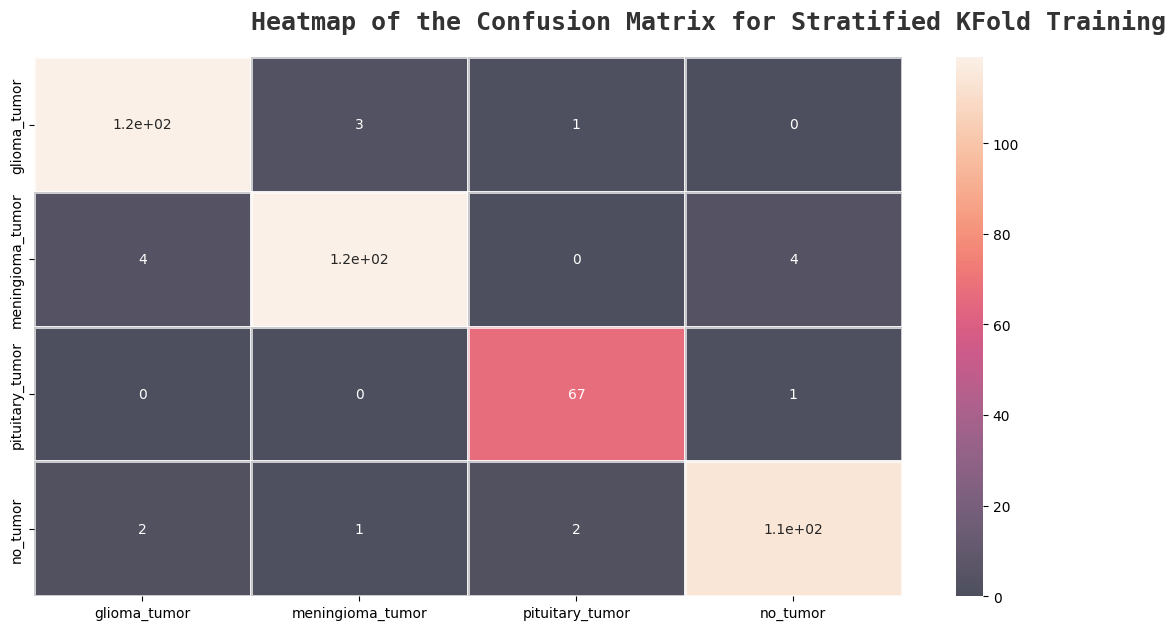

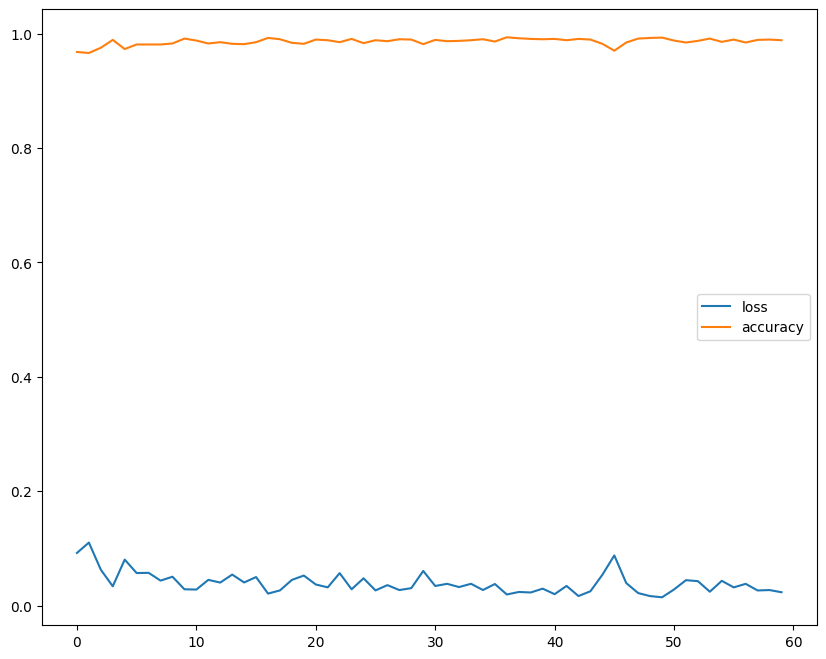

3
Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9911 - loss: 0.0271
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9894 - loss: 0.0295
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9784 - loss: 0.0563
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9873 - loss: 0.0349
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9880 - loss: 0.0433
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9917 - loss: 0.0205
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9844 - loss: 0.0323
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9840 - loss: 0.0519
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9885 - loss: 0.0271
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9818 - loss: 0.0391
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9891 - loss: 0.0322
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accurac

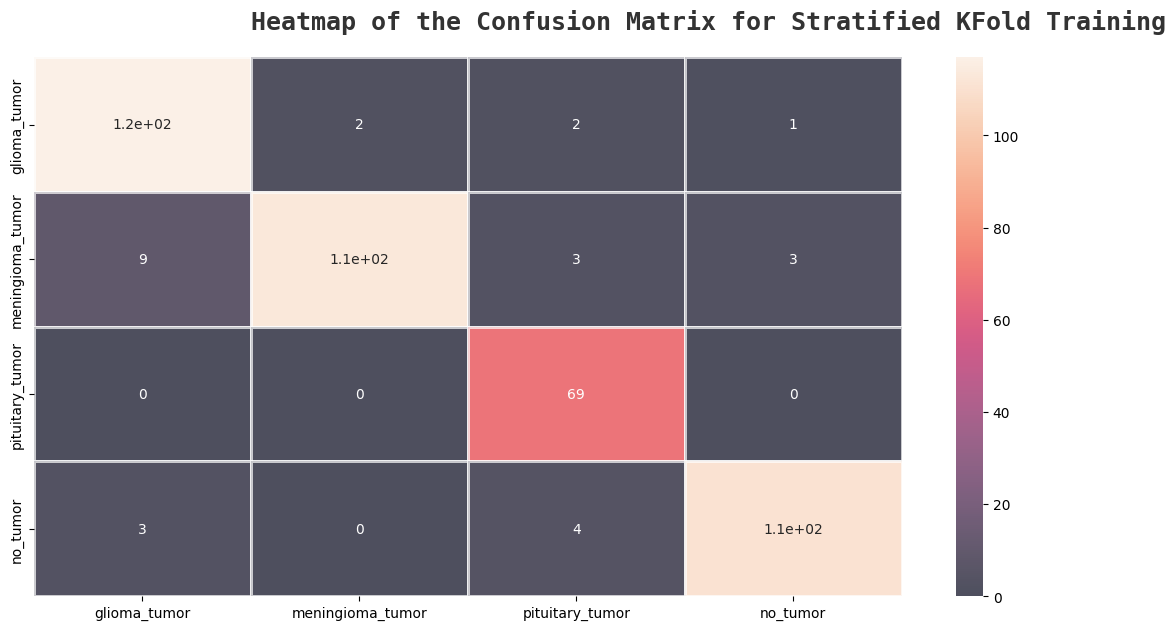

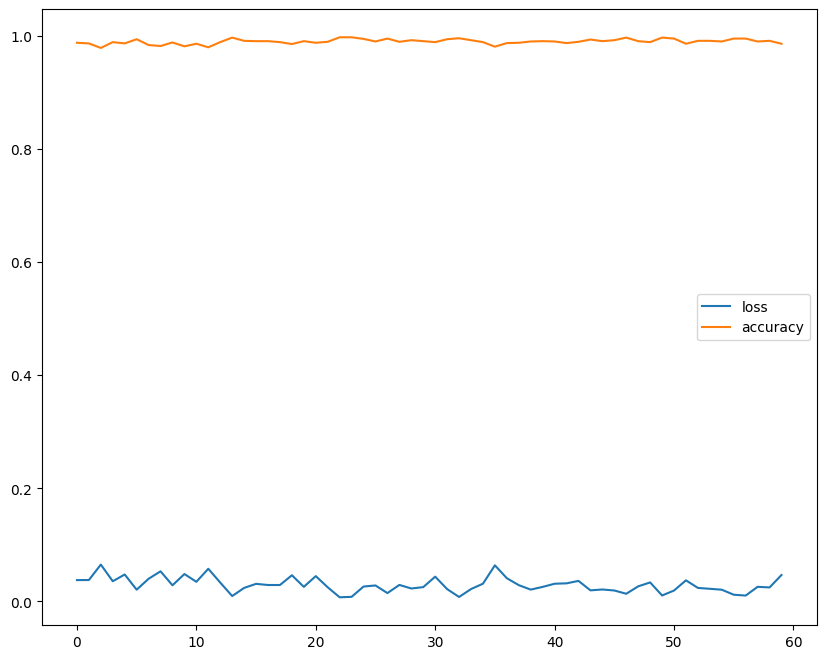

4
Epoch 1/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9828 - loss: 0.0653
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9785 - loss: 0.0659
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9876 - loss: 0.0414
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9946 - loss: 0.0153
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9893 - loss: 0.0275
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9920 - loss: 0.0259
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9904 - loss: 0.0320
Epoch 8/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9898 - loss: 0.0253
Epoch 9/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9906 - loss: 0.0236
Epoch 10/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9907 - loss: 0.0278
Epoch 11/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9883 - loss: 0.0211
Epoch 12/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accurac

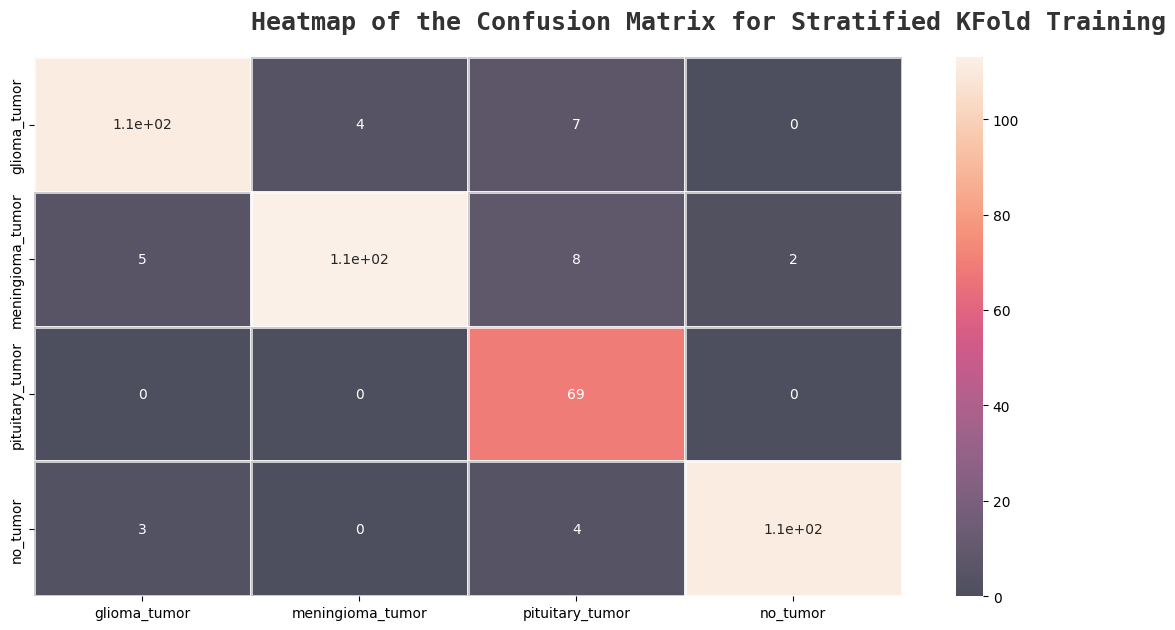

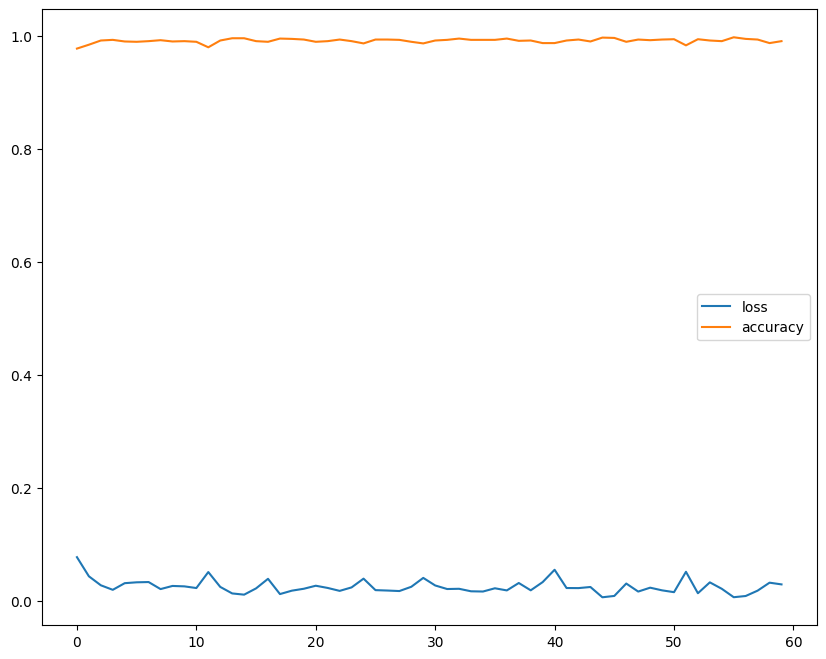

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
i=0
sumf=0
suma=0
for train_index, test_index in skf.split(X,y):
  print(i)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train_scaled=X_train/255
  X_test_scaled=X_test/255
  history=model0.fit(X_train_scaled, y_train, epochs=60)
  model0.evaluate(X_test_scaled,y_test)
  pred = model0.predict(X_test_scaled)
  pred = np.argmax(pred,axis=1)
  print(classification_report(y_test,pred))
  a=classification_report(y_test,pred,output_dict=True)
  fig,ax=plt.subplots(1,1,figsize=(14,7))
  sns.heatmap(confusion_matrix(y_test,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2)
  fig.text(s='Heatmap of the Confusion Matrix for Stratified KFold Training',size=18,fontweight='bold',fontname='monospace',y=0.92,x=0.28,alpha=0.8)
  plt.show()
  plt.figure(figsize=(10,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.legend(['loss','accuracy'])
  plt.show()
  sumf=sumf+a['0']['f1-score']
  suma=suma+a['accuracy']
  i=i+1


In [ ]:
print("Average F1:")
print(sumf/5)
print("Average accuracy:")
print(suma/5)

Average F1:
0.8869250163930138
Average accuracy:
0.9140089652361996


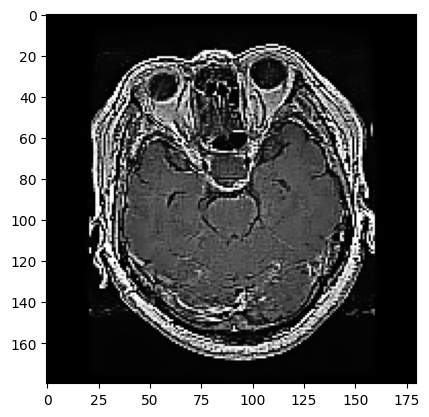

In [58]:
plt.imshow(X_real_test[0])

In [53]:
y_real_test[0]

3

In [ ]:
model0.evaluate(X_real_test,y_real_test)
pred0 = model0.predict(X_real_test)
pred0 = np.argmax(pred0,axis=1)
final=classification_report(y_real_test,pred0,output_dict=True)
print(classification_report(y_real_test,pred0))

34/34 [==============================] - 0s 14ms/step - loss: 0.5495 - accuracy: 0.9082
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       313
           1       0.89      0.85      0.87       300
           2       0.86      0.99      0.92       157
           3       0.96      0.93      0.95       308

    accuracy                           0.91      1078
   macro avg       0.90      0.92      0.91      1078
weighted avg       0.91      0.91      0.91      1078



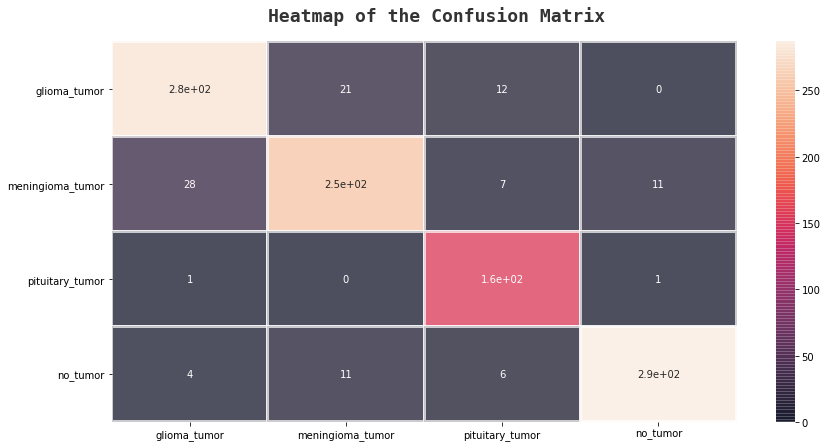

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_real_test,pred0),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,alpha=0.7,linewidths=2)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',fontname='monospace',y=0.92,x=0.28,alpha=0.8)
plt.show()